## Robustness Test

### Normal setting

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import time
import pickle
import random

from itertools import permutations
from functions import *

SEED = 123
random.seed(SEED)
np.random.seed(SEED)

In [2]:
from plotnine import ggplot, aes, labs, scales, theme, element_rect, element_text, geom_line, geom_point, geom_bar, geom_errorbar, geom_text, scale_x_continuous, scale_y_continuous

In [3]:
nc=4
nr=3

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

array([[10,  9,  3,  0],
       [ 3, 10, 10,  7],
       [ 0,  1,  1, 10]])

In [4]:
unique_routes = get_unique_routes(X)
unique_routes

array([[-1, -1,  1,  1,  1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1,  1, -1, -1]])

In [5]:
unique_paths = get_path_from_routes(X, unique_routes)
unique_paths

[{'path_id': 0, 'path': [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 1, 'path': [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 2, 'path': [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 3, 'path': [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 4, 'path': [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 5, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 6, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 7, 'path': [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 8, 'path': [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 9, 'path': [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]}]

In [6]:
for path_info in unique_paths:
    print(path_info['path_id'],get_weight_from_path(X,path_info['path']))

0 25
1 35
2 44
3 50
4 41
5 50
6 56
7 43
8 49
9 39


In [7]:
unique_routes = get_unique_routes(X)
unique_paths = get_path_from_routes(X, unique_routes)
#path_info_list = get_path_info_from_matrix(X)
boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

boot_sample_out = []
for idx in range(0,len(unique_routes)):
    boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
boot_sample_out = np.vstack(boot_sample_out)

#best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
best_route = unique_paths[np.argmax(boot_sample_out[:,1])]

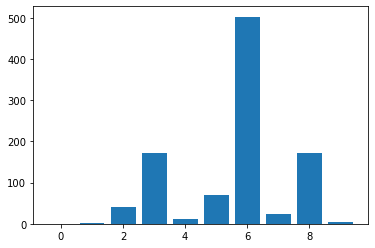

In [8]:
plt.bar(boot_sample_out[:,0], boot_sample_out[:,1])
plt.show()

In [9]:
boot_sample_out_all = []
for i in range(len(unique_routes)):
    boot_sample_out_all.append(np.array([i, boot_sample_out[boot_sample_out[:,0]==i][0][1]]))
        
boot_sample_out_all = np.vstack(boot_sample_out_all)

out_name = 'grid_example_normal'
with open(out_name, 'wb') as f:
    pickle.dump(boot_sample_out_all, f)

In [10]:
boot_sample_out_all

array([[  0,   0],
       [  1,   2],
       [  2,  41],
       [  3, 173],
       [  4,  12],
       [  5,  69],
       [  6, 503],
       [  7,  23],
       [  8, 172],
       [  9,   5]])

In [11]:
normal_mean = boot_sample_out_all[6][1]/1000
normal_std = 0
normal_mean, normal_std

(0.503, 0)

### Noisy setting

In [12]:
nc=4
nr=3

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

array([[10,  9,  3,  0],
       [ 3, 10, 10,  7],
       [ 0,  1,  1, 10]])

0.49324999999999997 0.016057582619932547


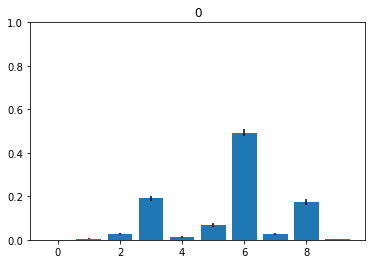

0.49407999999999985 0.015973892841923437


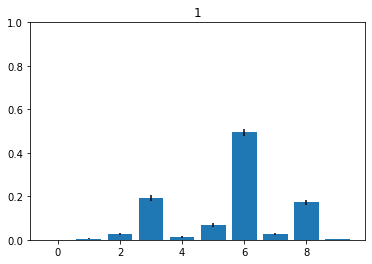

0.44716000000000017 0.03761869296780605


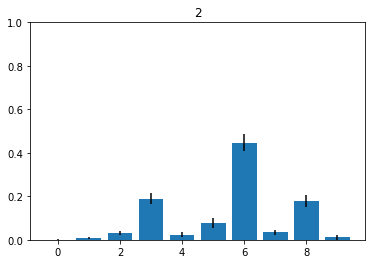

0.40902 0.050218106115406044


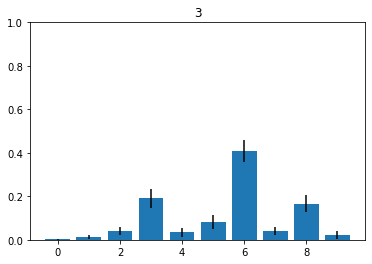

0.3675100000000001 0.05405094772059922


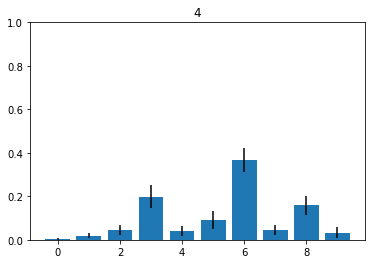

In [13]:
noisy_results = []

for noise in [0, 1, 2, 3, 4]:
    boot_sample_list = []
    best_route_list = []

    for _ in range(100):
        X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
        if noise != 0:
            X_noise = np.random.randint(low=0, high=noise, size=nc*nr).reshape(nr,nc)
            X = X + X_noise
            X = X.clip(0)

        unique_routes = get_unique_routes(X)
        unique_paths = get_path_from_routes(X, unique_routes)
        #path_info_list = get_path_info_from_matrix(X)
        boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

        boot_sample_out = []
        for idx in range(0,len(unique_routes)):
            boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
        boot_sample_out = np.vstack(boot_sample_out)
        boot_sample_list.append(boot_sample_out)

        #best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
        best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
        best_route_list.append(best_route)
        
    boot_sample_df = pd.DataFrame(np.array(boot_sample_list)[:,:,1])/1000
    noisy_results.append(boot_sample_df)
    
    print(boot_sample_df.mean()[6], boot_sample_df.std()[6])
    
    plt.bar(range(10), boot_sample_df.mean(), yerr=boot_sample_df.std())
    plt.ylim(0,1)
    plt.title(noise)
    plt.show()

In [14]:
noisy_df = []
for i in range(5):
    df = noisy_results[i]
    noisy_df.append([df[6].mean(), df[6].std()])

In [15]:
noisy_df = pd.DataFrame(noisy_df, columns=['mean', 'std'])
noisy_df.iloc[0]['mean'] = normal_mean
noisy_df.iloc[0]['std'] = normal_std

In [16]:
noisy_df['noise'] = ['0', '1', '2', '3', '4']
noisy_df['noise'] = noisy_df['noise'].astype(str)

In [17]:
noisy_df['ymin'] = (noisy_df['mean']-noisy_df['std']).clip(lower=0)
noisy_df['ymax'] = (noisy_df['mean']+noisy_df['std']).clip(lower=0)
noisy_df

,mean,std,noise,ymin,ymax
0,0.50300,0.000000,0,0.503000,0.503000
1,0.49408,0.015974,1,0.478106,0.510054
2,0.44716,0.037619,2,0.409541,0.484779
3,0.40902,0.050218,3,0.358802,0.459238
4,0.36751,0.054051,4,0.313459,0.421561


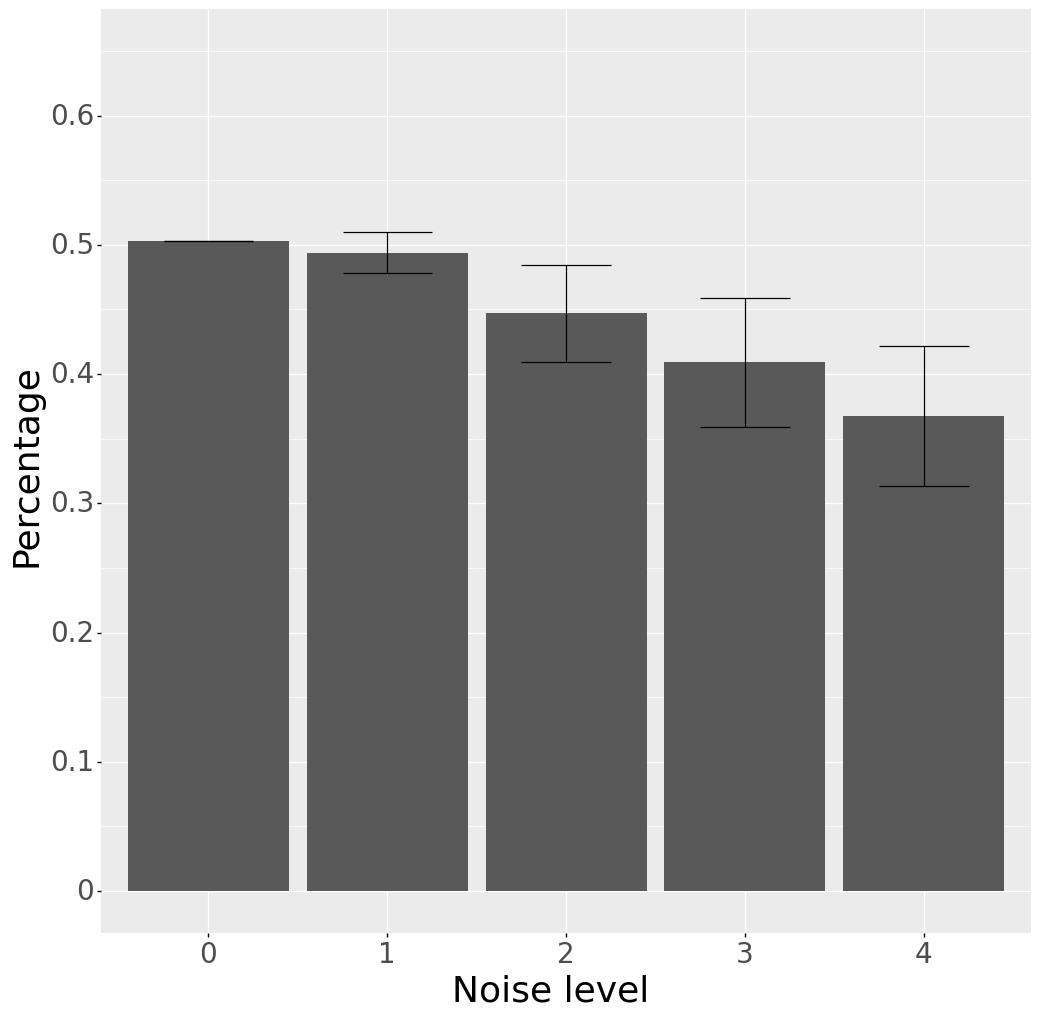

<ggplot: (8765224767953)>

In [18]:
(
    ggplot(data=noisy_df)
    + aes(x='noise', y='mean') 
    + labs(
        x = 'Noise level',
        y = 'Percentage') +
    geom_bar(stat='identity',position='dodge') + 
    geom_errorbar(data=noisy_df) + aes(ymin='ymin', ymax='ymax') + 
    scale_y_continuous(limits = (0,0.65), breaks=np.linspace(0,0.7,8)) + 
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'))
)

### Missing setting

In [19]:
nc=4
nr=3

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

array([[10,  9,  3,  0],
       [ 3, 10, 10,  7],
       [ 0,  1,  1, 10]])

0.4953699999999999 0.01599536233292689


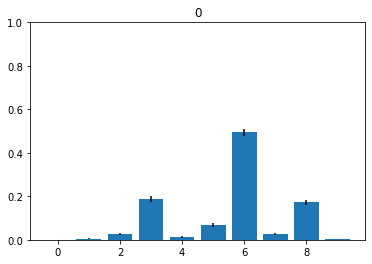

0.46638999999999997 0.061158164713397925


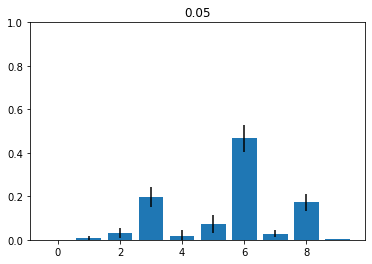

0.431 0.08231474455841536


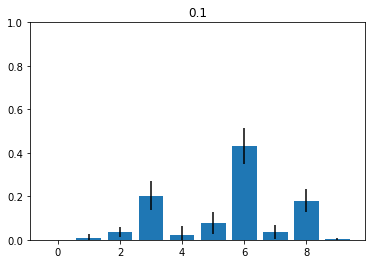

0.39210000000000006 0.10269121115501974


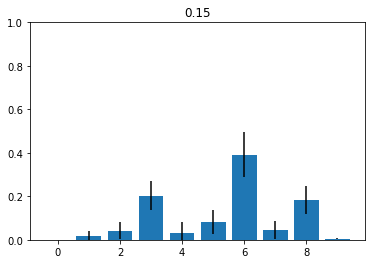

0.3854600000000001 0.0995308611599052


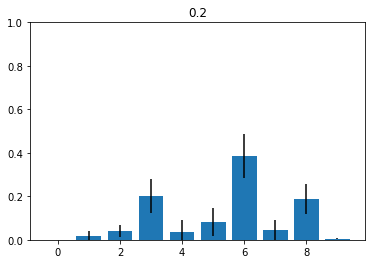

In [20]:
missing_results = []

for missing in [0, 0.05, 0.10, 0.15, 0.20]:
    boot_sample_list = []
    best_route_list = []

    for _ in range(100):
        X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
        if missing != 0:
            X_missing = np.random.choice([-1, 1], 12, p=[missing, 1-missing]).reshape(nr,nc)
            X = X * X_missing
            
            # Compute the median of the non-zero elements
            m = round(np.mean(X[X > 0]))
            # Assign the median to the zero elements 
            X[X < 0] = m

        unique_routes = get_unique_routes(X)
        unique_paths = get_path_from_routes(X, unique_routes)
        #path_info_list = get_path_info_from_matrix(X)
        boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

        boot_sample_out = []
        for idx in range(0,len(unique_routes)):
            boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
        boot_sample_out = np.vstack(boot_sample_out)
        boot_sample_list.append(boot_sample_out)

        #best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
        best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
        best_route_list.append(best_route)
        
    boot_sample_df = pd.DataFrame(np.array(boot_sample_list)[:,:,1])/1000
    missing_results.append(boot_sample_df)
    
    print(boot_sample_df.mean()[6], boot_sample_df.std()[6])
    
    plt.bar(range(10), boot_sample_df.mean(), yerr=boot_sample_df.std())
    plt.ylim(0,1)
    plt.title(missing)
    plt.show()

In [21]:
missing_df = []
for i in range(5):
    df = missing_results[i]
    missing_df.append([df[6].mean(), df[6].std()])

In [22]:
missing_df = pd.DataFrame(missing_df, columns=['mean', 'std'])
missing_df.iloc[0]['mean'] = normal_mean
missing_df.iloc[0]['std'] = normal_std

In [23]:
missing_df['missing'] = ['0', '0.05', '0.10', '0.15', '0.20']
missing_df['missing'] = missing_df['missing'].astype(str)

In [24]:
missing_df['ymin'] = (missing_df['mean']-missing_df['std']).clip(lower=0)
missing_df['ymax'] = (missing_df['mean']+missing_df['std']).clip(lower=0)
missing_df

,mean,std,missing,ymin,ymax
0,0.50300,0.000000,0,0.503000,0.503000
1,0.46639,0.061158,0.05,0.405232,0.527548
2,0.43100,0.082315,0.10,0.348685,0.513315
3,0.39210,0.102691,0.15,0.289409,0.494791
4,0.38546,0.099531,0.20,0.285929,0.484991


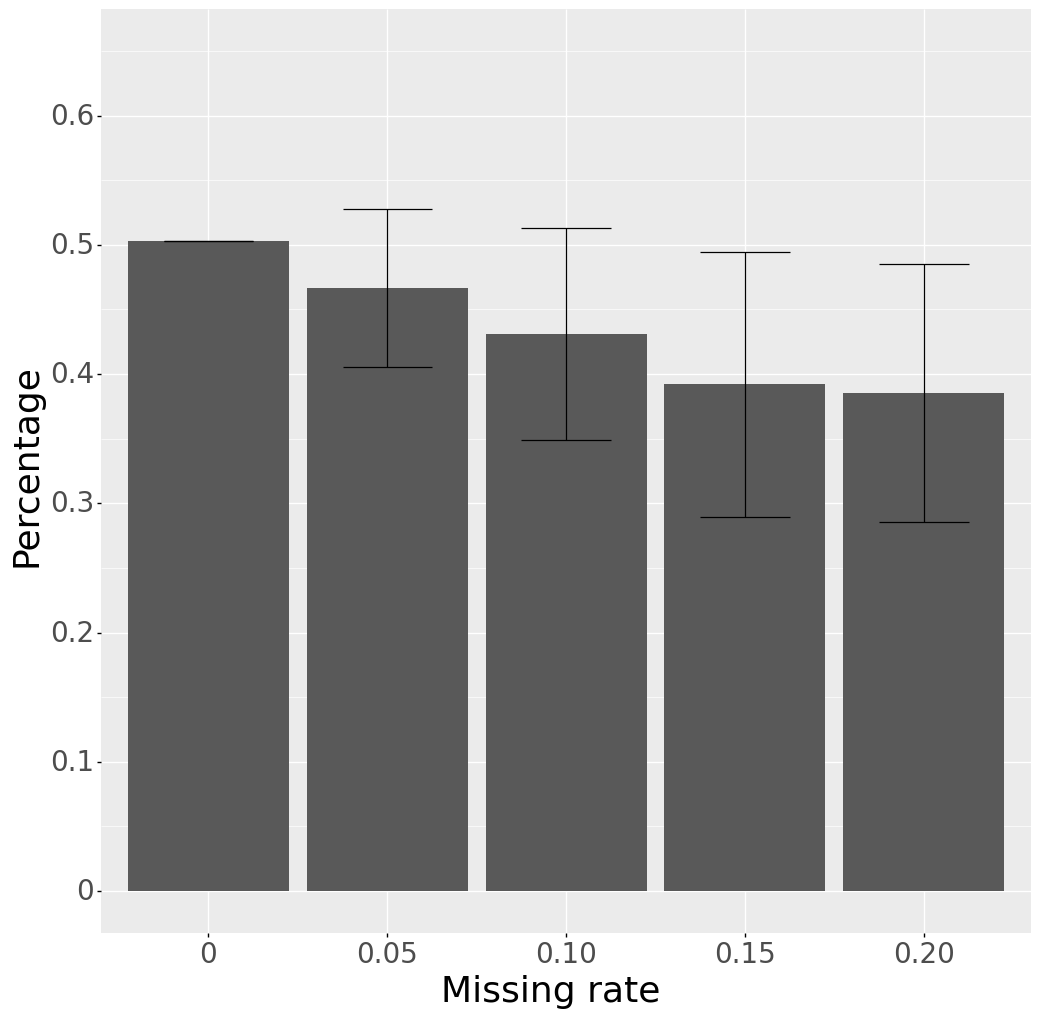

<ggplot: (8765224515617)>

In [25]:
(
    ggplot(data=missing_df)
    + aes(x='missing', y='mean') 
    + labs(
        x = 'Missing rate',
        y = 'Percentage') +
    geom_bar(stat='identity',position='dodge') + 
    geom_errorbar(data=missing_df) + aes(ymin='ymin', ymax='ymax') + 
    scale_y_continuous(limits = (0,0.65), breaks=np.linspace(0,0.7,8)) + 
    theme(figure_size=(12,12), axis_text_x=element_text(size=20), axis_text_y=element_text(size=20), \
          axis_title_x=element_text(size=26, weight='normal'), axis_title_y=element_text(size=26, weight='normal'))
)